# Processing data in hdf5 file using NexusFile

The aim of this notebook is to teach you how to use the NexusFile class from the `SWAXSanalysis.class_nexus_file` module to treat data present in an HDF5 file formated to the NXcanSAS definition. The treatment method are precosntructed but have a lot of parameters.

In [1]:
# Imports

%matplotlib ipympl

import os
import h5py
from pathlib import Path

from SWAXSanalysis.class_nexus_file import NexusFile
from SWAXSanalysis.utils import explore_file

  File "C:\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\AT280565\Desktop\Data Treatment Center\Jupyter notebooks\.venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\AT280565\Desktop\Data Treatment Center\Jupyter notebooks\.venv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\AT280565\Desktop\Data Treatment Center\Jupyter notebooks\.venv\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\AT280565\Desktop\Data Treatment Center\Jupyter notebooks\.venv\lib\site-packages\tornado\platform\asyncio.py", line 211, in start
    self.asyncio_loop.run_forever()
  File "C:\Python310\lib\asyncio\base_events.py", line 595, in run_forever
    self._run_once()
 

## Setting up your list of files

To load the files you want to treat, choose a folder to put your data in. As an example we'll use the data file provided in the Example **.\Data Treatment Center\Jupyter notebooks\NoteBook\Example HDF5**.

Once you moved the data to your folder, you can build the list of file this way :

In [2]:
# This is the path you want to change
data_dir = Path(r".\Example HDF5")

path_list = []

for file in data_dir.iterdir():
    if file.suffix == ".h5":
        path_list.append(file)
        print(file.name)


testSample_SAXS_00001.h5


## Inspecting your h5 file

The function `explore_file` can be used to visualize the structure of the HDF5 file you want to treat. Thanks to this function you'll be able to know precisely where everything is. alternatively, you can use HDFView to visualize your HDF5 file.
There are three types of element :

    - GROUPS : you can view them as a directory, it can contain other groups, dataset or attributes
    - data_sets : you can view them as a file, it can only contain attributes
    - @attributes : you can view them as metadata, it cannot contain anything and gives additional information
    
You just need to open your file, thanks to `h5py.File("path", "r")` and pass the resulting object to the function.

#### Data groups
What we call "data groups" are simply group that contain your data. They are the groups that starts with "DATA". When you save data into the HDF5 you can name the group whatever you'd like but i recommend sticking with the "DATA_..." format, that way ou can easily recognize a data group.

In [3]:
example_hdf5_path =  Path(r".\Example HDF5\testSample_SAXS_00001.h5")

with h5py.File(example_hdf5_path, "r") as file_object:
    explore_file(file_object, explore_group=True, explore_attribute=True)

Exploring HDF5 structure...

├──Group : ENTRY
|  ├──Attr : NX_class
|  ├──Attr : canSAS_class
|  ├──Attr : default
|  ├──Attr : version
|  ├──Group : ENTRY/COLLECTION
|  |  ├──Attr : NX_class
|  |  ├──Attr : canSAS_class
|  |  ├──Dataset : ENTRY/COLLECTION/do_absolute_intensity
|  |  |  ├──Attribute : dbpath
|  |  ├──Dataset : ENTRY/COLLECTION/experiment_type
|  |  ├──Dataset : ENTRY/COLLECTION/exposition_time
|  |  |  ├──Attribute : units
|  |  ├──Dataset : ENTRY/COLLECTION/geometry
|  |  ├──Dataset : ENTRY/COLLECTION/sample_fixture
|  |  ├──Dataset : ENTRY/COLLECTION/username
|  ├──Group : ENTRY/DATA
|  |  ├──Attr : I_axes
|  |  ├──Attr : NX_class
|  |  ├──Attr : Q_indices
|  |  ├──Attr : canSAS_class
|  |  ├──Attr : mask
|  |  ├──Attr : mask_indices
|  |  ├──Attr : signal
|  |  ├──Attr : timestamp
|  |  ├──Dataset : ENTRY/DATA/I
|  |  |  ├──Attribute : scaling_factor
|  |  |  ├──Attribute : uncertainties
|  |  |  ├──Attribute : units
|  |  ├──Dataset : ENTRY/DATA/Idev
|  |  |  ├──At

# Processing using NexusFile

## Opening your files

To open your file in a python script, you need to use the `NexusFile` class, pass a **list** of the paths of all the data you want to treat. There are 2 parameters to the constructor of this class:
- do_batch : This will determine wether you want to display your data in different graphs or in the same figure.
- input_data_group : This will determine what data group should be used as the raw data. By default it's the "DATA" group (the data as it came out of the machine). However, let's say you substracted the raw data by some background and saved it as "DATA_NO_BACK"; You can put input_data_group="DATA_NO_BACK" to use this data as if it was the raw data.

### Be careful : 
- the input_data_group should be raw data or scaled raw data, I do not know what would happen if you put anything other than that as an input data group.
- When you do a process use the try: / finally: environement as shown below. This is to ensure that the files are properly repacked and closed no matter what happens

In [4]:
nx_files = NexusFile(path_list, do_batch=True)
try:
    print("file opened!")
except Exception as error:
    print(error)
finally:
    nx_files.nexus_close() # Very important !
    print("file closed!")

file opened!
file closed!


## Showing available method in NexusFile

Now that you know how to open files, we can start processing data, but you might need some information regarding the methods of NexusFile. To show such information you can use the `show_method` method.

Using the method without any parameters will return a string with the list of all the available method. Methods starting with "process" are methods used to treat data.

Using it with a method name will print more info on the method itself. Let's see what does process_q_space does.

In [5]:
nx_files = NexusFile(path_list, do_batch=True)
try:
    print("file opened!")
    # Calling show_method without any parameter :
    print(nx_files.show_method())
    
    # Calling show method with the name of another method
    print(nx_files.show_method("process_q_space"))
except Exception as error:
    print(error)
finally:
    nx_files.nexus_close() # Very important !
    print("file closed!")

file opened!

add_file
get_file
get_parameters
get_process_desc
get_raw_data
nexus_close
process_2_param_intensity
process_absolute_intensity
process_azimuthal_average
process_caking
process_delete_data
process_display
process_horizontal_integration
process_q_space
process_radial_average
process_vertical_integration
show_method
Please rerun this function and pass the name of one method as a parameter
to get more information concerning this particular method

process_q_space
Docstring : 
        Method used to put the data in Q space (Fourier space).
        This will save an array containing the intensity values
        and another array containing the vector Q associated
        to each intensities

        Parameters
        ----------
        percentile :
            Controls the intensity range. It will go from 0 to percentile / 100 * (max intensity)

        display :
            Choose if you want the result displayed or not

        save :
            Choose if you want the resu

## Applying a process

Now unto the actual processing part. To process data, simply use the method(s) you selected and set the parameters.

As an example we'll go from the raw data to the 1D profile, let's see how we can do this.

file opened!


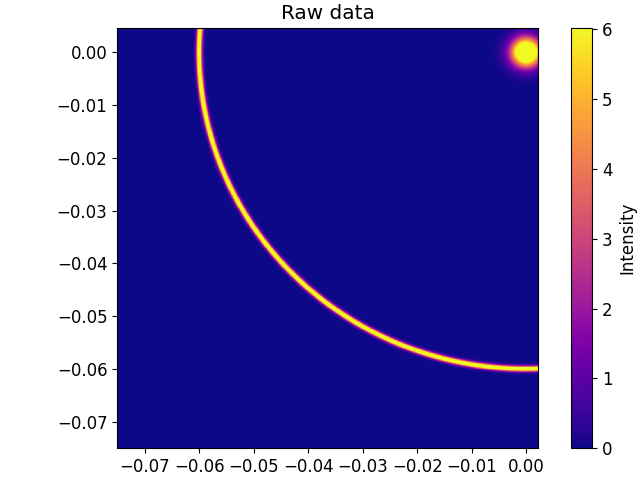

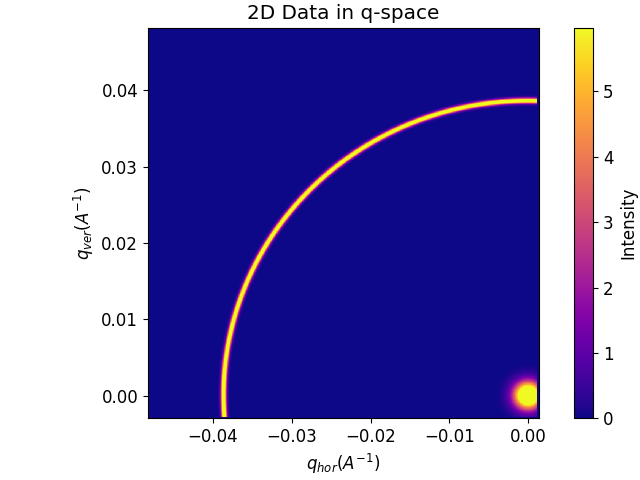

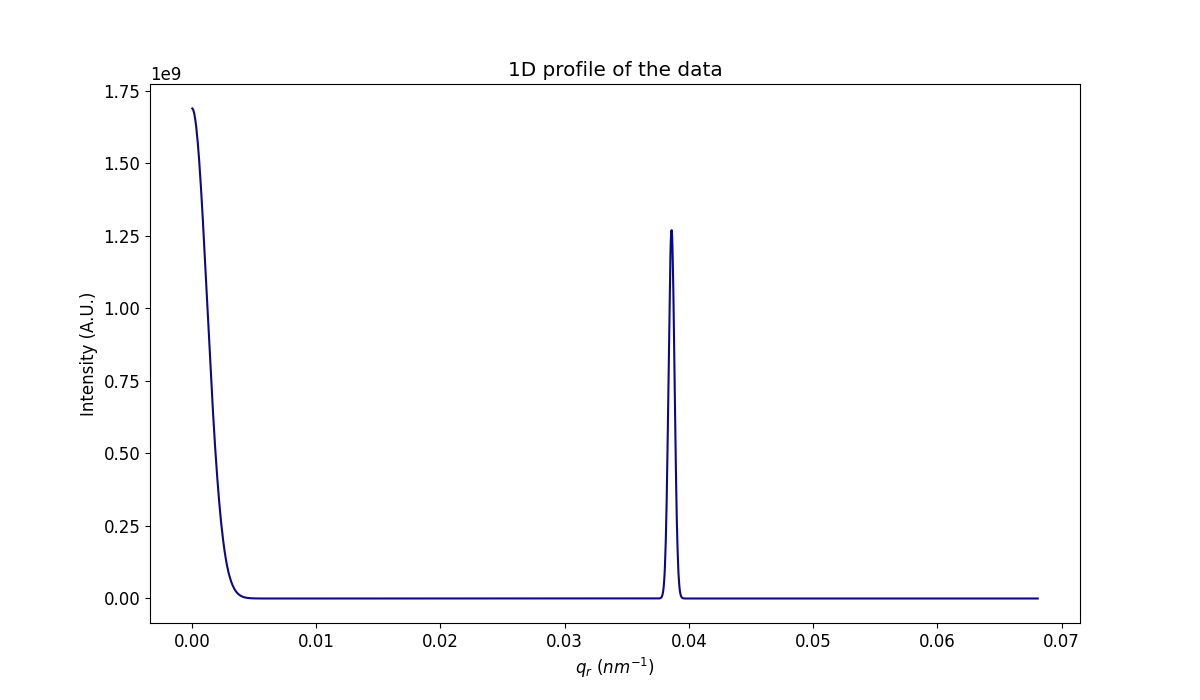

file closed!


In [6]:
nx_files = NexusFile(path_list, do_batch=True)
try:
    print("file opened!")
    nx_files.process_display(
        group_name="DATA",
        percentile=99,
        title = "Raw data"
    )
    nx_files.process_q_space(
        display=True,
        save=True,
        group_name="DATA_Q_SPACE",
        percentile=99
    )
    # The default display is not very satisfactory in this case
    nx_files.process_radial_average(
        display=False,
        save=True,
        group_name="DATA_RAD_AVG"
    )
    nx_files.process_display(
        group_name="DATA_RAD_AVG",
        percentile=99,
        title = "1D profile of the data",
        scale_y="linear",
        scale_x="linear",
        label_x="$q_r$ ($nm^{-1}$)",
        label_y="Intensity (A.U.)"
    )
except Exception as error:
    print(error)
    raise error
finally:
    nx_files.nexus_close() # Very important !
    print("file closed!")

## The process group

When you use one of NExusFile's premade processes, a new group called "PROCESS_..." will be created. This group contains info regarding what hapenned to the data in the corresponding data group, this ensure reproductability.

To access what's inside this group you can use the `get_process_desc` method, this will return a dictionnary :
- 

In [7]:
nx_files = NexusFile(path_list, do_batch=True)
try:
    print("file opened!")
    # Calling show_method without any parameter :
    process_desc = nx_files.get_process_desc(group_name="PROCESS_RAD_AVG")
    print(process_desc)
    print(process_desc["testSample_SAXS_00001.h5"])
except Exception as error:
    print(error)
finally:
    nx_files.nexus_close() # Very important !
    print("file closed!")

file opened!
{'testSample_SAXS_00001.h5': 'This process integrates the intensity signal over a specified radial angle rangeand radial q range.\nParameters used :\n   - Azimuthal range : [-180.0000, 180.0000]\n   - Radial Q range : [0.0000, 0.0681] with 2000 points\n'}
This process integrates the intensity signal over a specified radial angle rangeand radial q range.
Parameters used :
   - Azimuthal range : [-180.0000, 180.0000]
   - Radial Q range : [0.0000, 0.0681] with 2000 points

file closed!
